In [45]:
import datetime



import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from tensorflow.python.keras.layers import Dropout

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.unicode_minus'] = False

In [46]:

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [47]:
df = pd.read_csv('./data/best.csv', index_col = 0)
df['날짜'] = df['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df = df.set_index('날짜')

display(df)

,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
날짜,,,,,,,
2017-01-01,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...
2021-05-23,대파(일반),0.0,1883.0,1546.0,상,19.7,0.0
2021-05-24,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
2021-05-25,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0


In [48]:
df['평균가격'] = df['평균가격'].replace(0, np.NaN)
display(df)

,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
날짜,,,,,,,
2017-01-01,대파(일반),NaN,2164.0,0.0,상,4.3,0.0
2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...
2021-05-23,대파(일반),NaN,1883.0,1546.0,상,19.7,0.0
2021-05-24,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
2021-05-25,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0


In [49]:
df = df.fillna(df.mean())
df = df.round(1)
display(df)

,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
날짜,,,,,,,
2017-01-01,대파(일반),1937.3,2164.0,0.0,상,4.3,0.0
2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...
2021-05-23,대파(일반),1937.3,1883.0,1546.0,상,19.7,0.0
2021-05-24,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
2021-05-25,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2017-01-01 to 2021-05-27
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   품목명     1581 non-null   object 
 1   평균가격    1581 non-null   float64
 2   전일평균가격  1581 non-null   float64
 3   전년가격    1581 non-null   float64
 4   등급      1581 non-null   object 
 5   평균기온    1581 non-null   float64
 6   강수량     1581 non-null   float64
dtypes: float64(5), object(2)
memory usage: 98.8+ KB


<AxesSubplot:xlabel='날짜'>

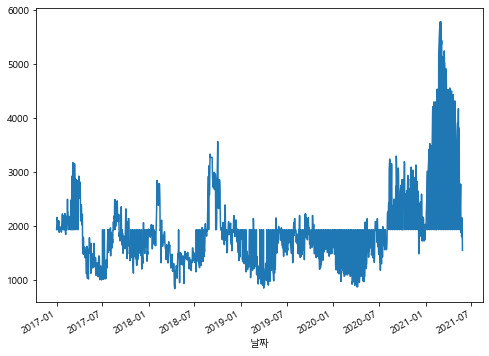

In [51]:
plt.rc('font', family='Malgun Gothic')
df['평균가격'].plot()

<AxesSubplot:xlabel='날짜'>

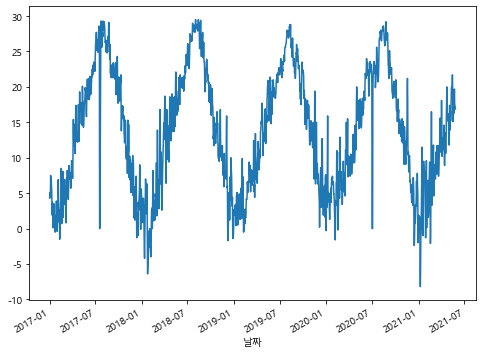

In [52]:
plt.rc('font', family='Malgun Gothic')
df['평균기온'].plot()



### 데이터 정규화

In [53]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols=['평균가격','평균기온','강수량']
df_scaled=scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

display(df_scaled)

,평균가격,평균기온,강수량
0,0.220979,0.331565,0.000000
1,0.266842,0.352785,0.000000
2,0.253894,0.334218,0.000000
3,0.253894,0.416446,0.001639
4,0.253894,0.408488,0.000656
...,...,...,...
1576,0.220979,0.740053,0.000000
1577,0.194012,0.684350,0.000000
1578,0.264617,0.676393,0.000000
1579,0.264414,0.671088,0.002295


### 시계열 데이터의 데이터셋 분리

In [54]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test= df_scaled[-TEST_SIZE:]

In [55]:
def make_dataset(data, label, window_size = 20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list),np.array(label_list)

In [56]:
from sklearn.model_selection import train_test_split

feature_cols = ['평균기온', '강수량']
label_cols = ['평균가격']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature,train_label,20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(1088, 20, 2) (273, 20, 2)


In [57]:
print(x_train)

[[[5.03978780e-01 0.00000000e+00]
  [5.96816976e-01 0.00000000e+00]
  [6.52519894e-01 0.00000000e+00]
  ...
  [6.57824934e-01 1.24590164e-01]
  [6.68435013e-01 9.18032787e-02]
  [6.55172414e-01 1.63934426e-03]]

 [[3.10344828e-01 0.00000000e+00]
  [2.91777188e-01 0.00000000e+00]
  [3.42175066e-01 0.00000000e+00]
  ...
  [4.85411141e-01 0.00000000e+00]
  [5.30503979e-01 0.00000000e+00]
  [5.67639257e-01 0.00000000e+00]]

 [[2.99734748e-01 1.63934426e-03]
  [3.20954907e-01 0.00000000e+00]
  [2.06896552e-01 0.00000000e+00]
  ...
  [3.52785146e-01 3.27868852e-03]
  [2.36074271e-01 0.00000000e+00]
  [3.18302387e-01 1.63934426e-03]]

 ...

 [[9.73474801e-01 1.31147541e-03]
  [9.57559682e-01 0.00000000e+00]
  [9.76127321e-01 0.00000000e+00]
  ...
  [9.23076923e-01 1.34426230e-02]
  [9.31034483e-01 0.00000000e+00]
  [9.49602122e-01 0.00000000e+00]]

 [[8.96551724e-01 6.88524590e-03]
  [8.96551724e-01 0.00000000e+00]
  [8.96551724e-01 3.27868852e-04]
  ...
  [9.73474801e-01 0.00000000e+00]
  [9

In [58]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 2), (200, 1))

In [59]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 2), (180, 1))

### 모형 학습

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM

In [61]:
model = Sequential()
model.add(LSTM(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False))

model.add(Dense(1))

In [62]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)


history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=early_stop)

Epoch 1/200
68/68 [==============================] - 1s 5ms/step - loss: 0.0374 - val_loss: 0.0089
Epoch 2/200
68/68 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.0087
Epoch 3/200
68/68 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 4/200
68

In [63]:
pred= model.predict(test_feature)

pred.shape

(180, 1)

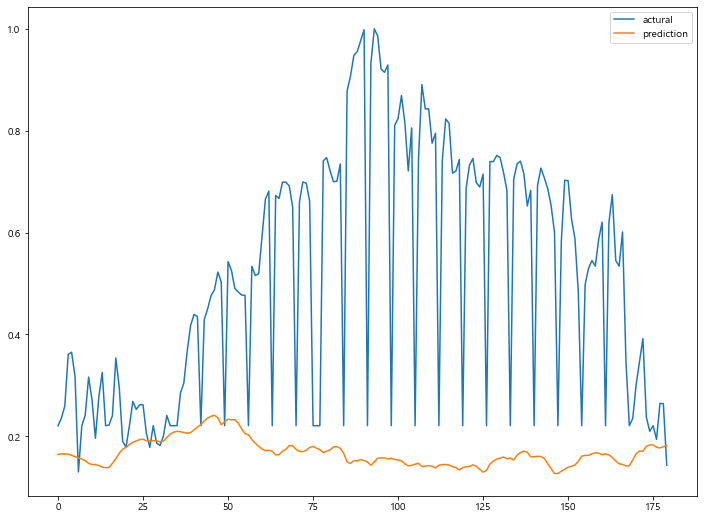

In [64]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label = 'actural')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

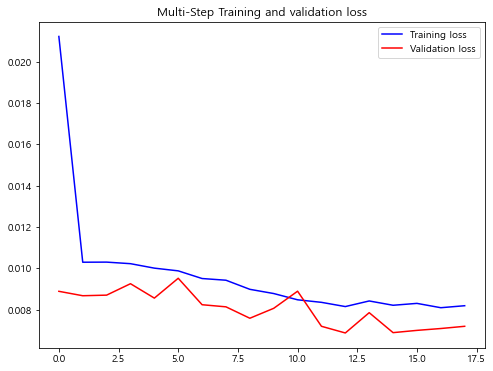

In [67]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label = 'Training loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(history, 'Multi-Step Training and validation loss')


In [69]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ',trainScore)
valScore = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation Score: ',valScore)

Train Score:  0.007826568558812141
Validation Score:  0.007195987273007631


ValueError: not enough values to unpack (expected 2, got 1)